In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def stepFunc(x):
    return np.array(x>0, dtype=np.int)

In [3]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [4]:
def reLU(x):
    return np.maximum(0,x)

In [5]:
# tanh = sinh(x)/cosh(x)
def tanh(x):
    return (np.exp(x) - np.exp(-x))/(np.exp(x)+np.exp(-x))

In [6]:
def eLU(x, a = 1):
    return [x1 if x1>0 else a *(np.exp(x1)-1) for x1 in x ]
    #y = x.copy()
    #y[x<0] = a *(np.exp(y[x<0])-1)
    #return y

In [7]:
def pReLU(x, a=0.1):
    return np.maximum(a*x, x)

In [8]:
def plotFunc():
    x = np.arange(-5.0, 5.0, 0.05)
    fig = plt.figure()
    ax = fig.add_subplot(321)
    ax.plot(x,stepFunc(x))
    ax.text(-4.9,0.7,'step function')
    ax = fig.add_subplot(322)
    ax.plot(x,sigmoid(x), c='red')
    ax.text(-4.9,0.7,'sigmoid')
    ax = fig.add_subplot(323)
    ax.plot(x,eLU(x), c='black')
    ax.text(-4.9,4,'ELU')
    ax = fig.add_subplot(324)
    ax.plot(x,reLU(x), c='green')
    ax.text(-4.9,4,'ReLU')
    ax = fig.add_subplot(325)
    ax.plot(x,tanh(x), c='blue')
    ax.text(-4.9,0.7,'tanh')
    ax = fig.add_subplot(326)
    ax.plot(x,pReLU(x), c='pink')
    ax.text(-4.9,4,'PReLU')
    plt.show()

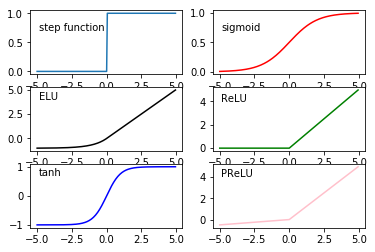

In [9]:
plotFunc()

In [10]:
#恒等函数
def identifyFunc(x):
    return x

In [11]:
def initNetwork():
    W = []; B = []
    W.append(np.array([[0.1,0.3,0.5],[0.2,0.4,0.6]]))
    B.append(np.array([0.1,0.2,0.3]))
    W.append(np.array([[0.1,0.4],[0.2,0.5],[0.3,0.6]]))
    B.append(np.array([0.1,0.2]))
    W.append(np.array([[0.1,0.3],[0.2,0.4]]))
    B.append(np.array([0.1,0.2]))
    return W, B, 3

In [12]:
def calcLayer(A, w, b, h=sigmoid):
    return h(np.dot(A,w) + b)

In [13]:
def forward(network, x, h=sigmoid, sigma = identifyFunc ):
    W, B, l = network
    A = x
    for i in range(l-1):
        A = calcLayer(A, W[i], B[i], h)
    return calcLayer(A, W[l-1], B[l-1], sigma)

In [14]:
network = initNetwork()
x = np.array([1.0,0.5])
forward(network,x)

array([0.31682708, 0.69627909])

In [18]:
def softmax(x):
    c = np.max(x)
    expA = np.exp(x - c)
    return expA / np.sum(expA)

In [21]:
forward(network,x,sigma = softmax)

array([0.40625907, 0.59374093])